In [1]:
from utils_pipeline import DataLoader, XGBClassifier_model, explainable_AI

e:\DS\churn_custom\bccp\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
e:\DS\churn_custom\bccp\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, 

In [2]:
# Load data
data_loader = DataLoader()
data_loader.load_dataset()
data = data_loader.data
data.shape

(10000, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


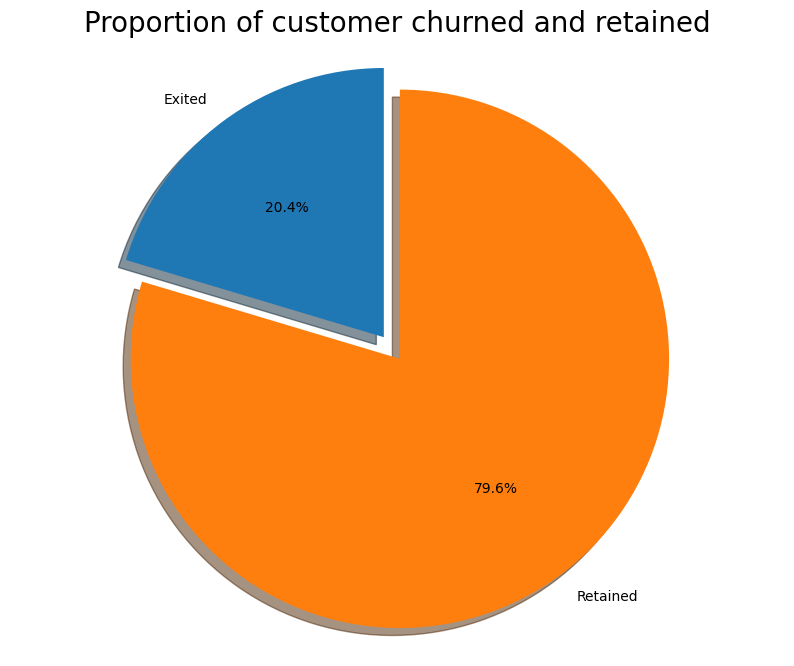

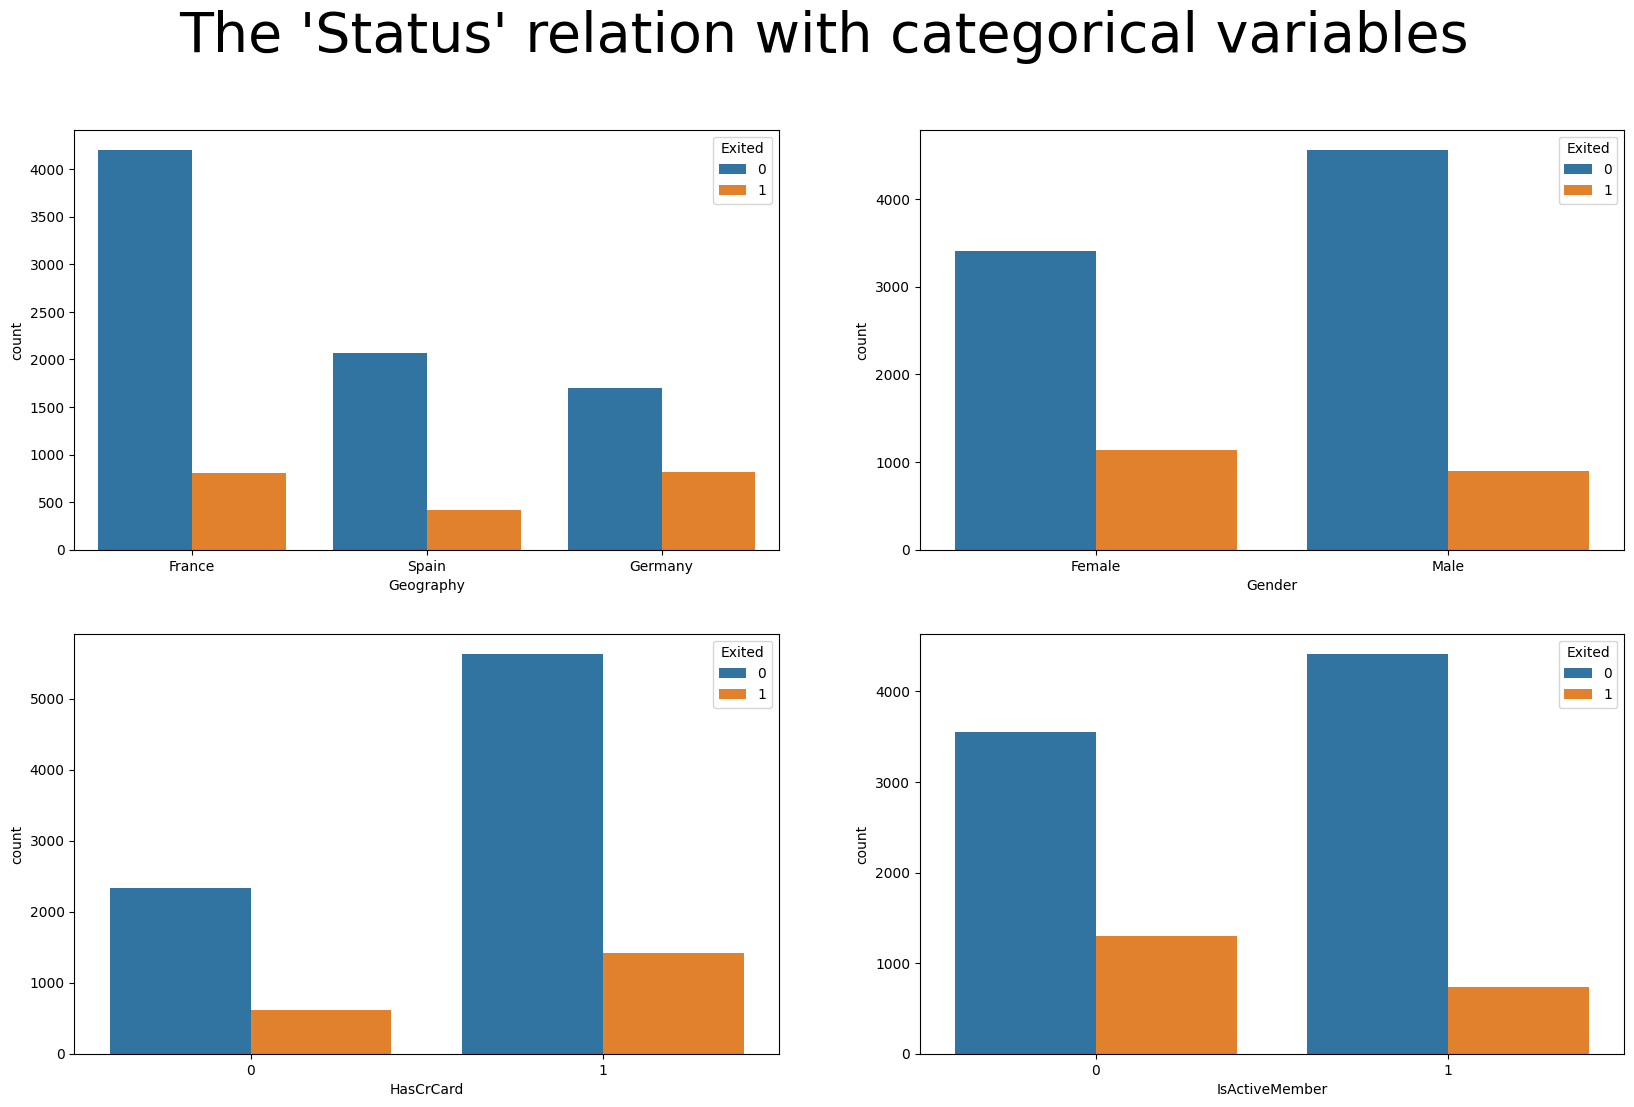

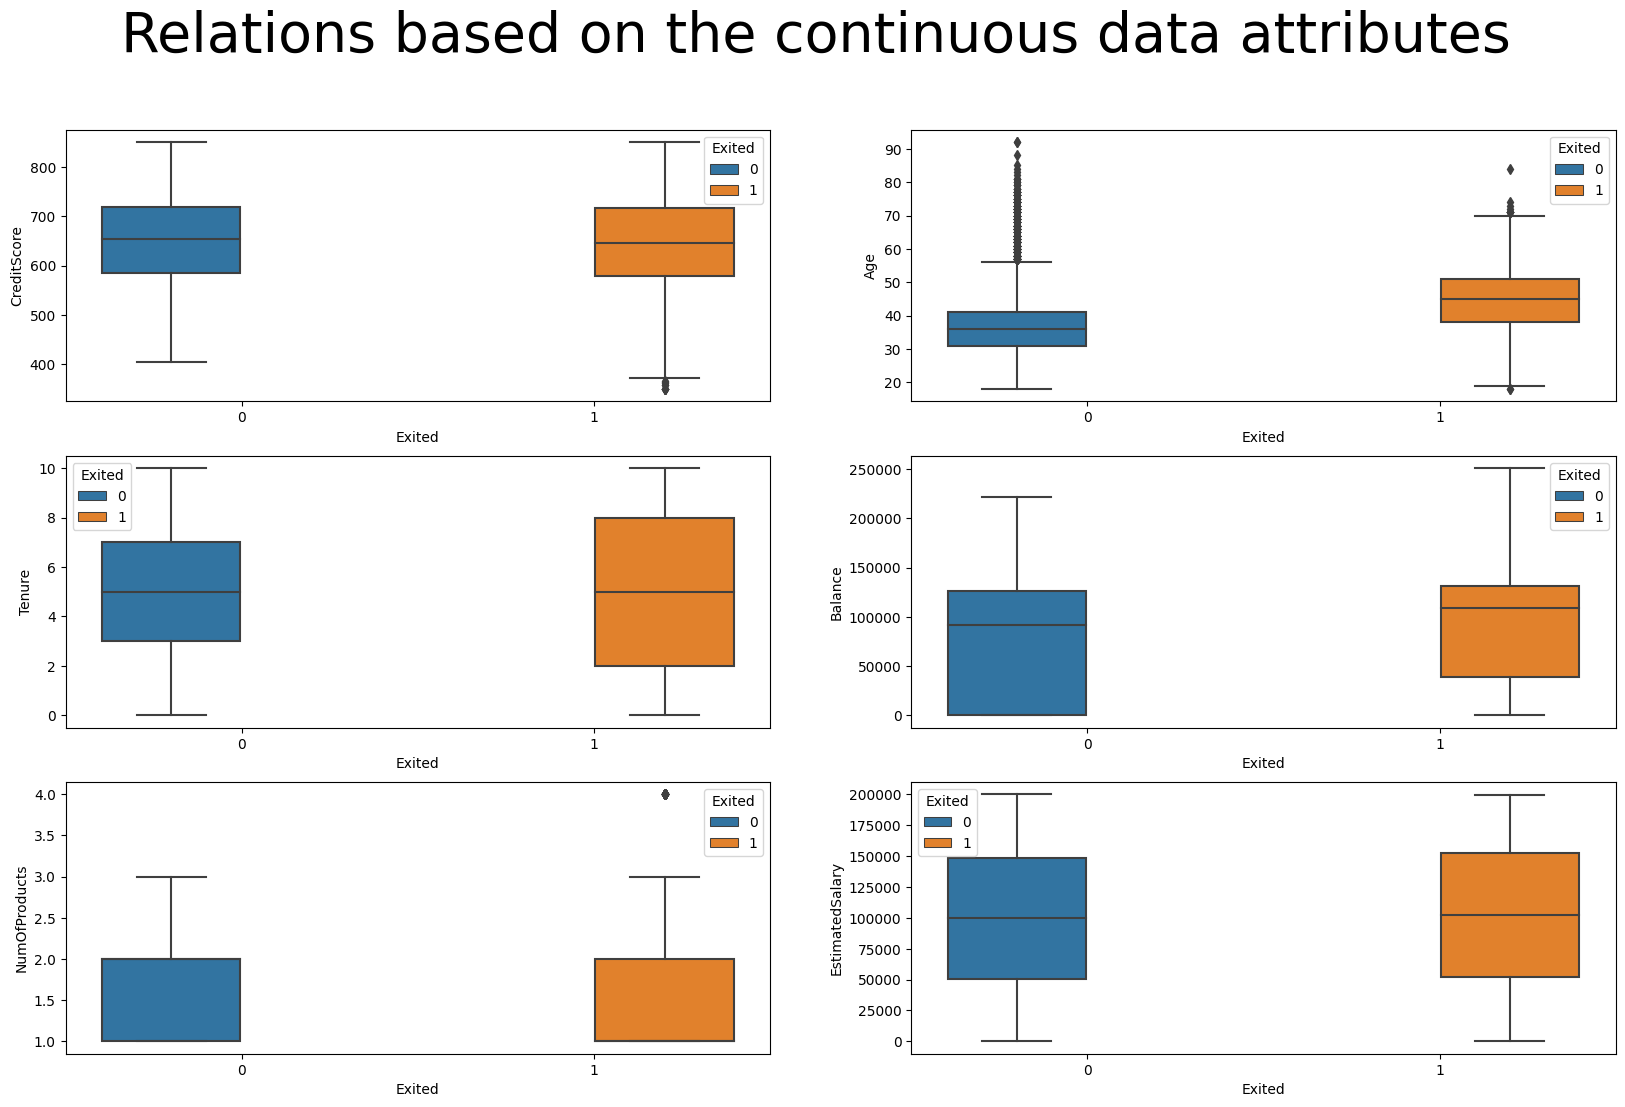

In [4]:
data_loader.exploratory_data_analysis()
data_loader.feature_engineering()

In [5]:
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
X_train.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
5541,0,0,1,0,1,0,1,0.474,0.445946,0.3,0.333758,0.000000,0.744005,0.000053,0.105882,0.158277
5408,0,0,1,1,0,1,1,0.664,0.486486,0.0,0.331221,0.333333,0.270633,0.000145,0.000000,0.184919
2364,1,0,0,1,0,0,0,0.714,0.175676,0.2,0.329966,0.333333,0.457104,0.000085,0.116129,0.427042
1257,1,0,0,1,0,1,1,0.556,0.270270,0.3,0.000000,0.333333,0.244589,0.000000,0.142105,0.277628
6342,1,0,0,1,0,1,0,0.462,0.256757,1.0,0.415527,0.000000,0.433030,0.000113,0.486486,0.258033


2023/06/16 11:28:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


2023/06/16 11:28:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/06/16 11:28:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/06/16 11:28:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9bd21e26b883466c950e8844f272b2eb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2023/06/16 11:28:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "e:\DS\churn_custom\bccp\lib\site-packages\mlflow\models\signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training datas

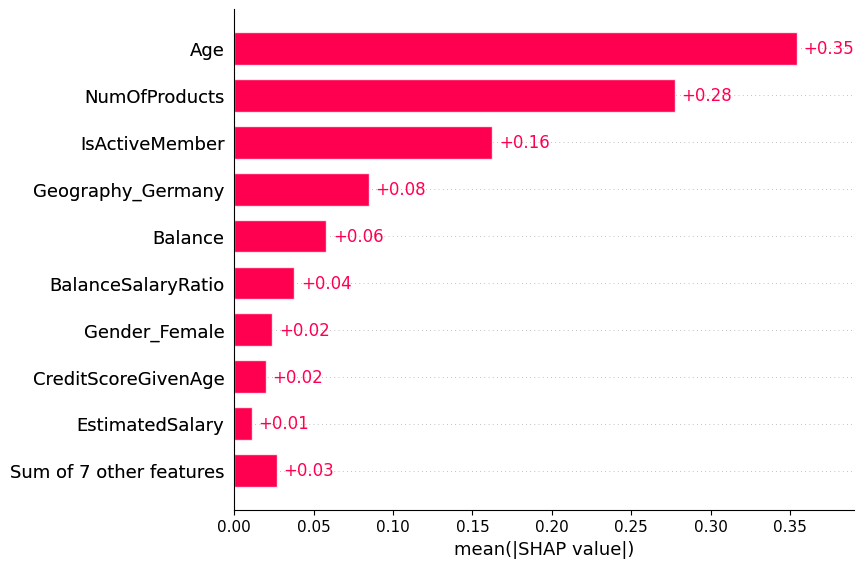

In [6]:
XGB = XGBClassifier_model(X_train, y_train)
explainable_AI(XGB, X_test)